In [2]:
%load_ext autoreload
%autoreload 2

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [79]:
# Define your functions in organised individual python files. Don't throw them randomly in the notebook

## Import image processing modules
import os
import numpy as np
from PIL import Image

from utils import load_data, load_data_AR

## Import Algorithms
from algs import NmfL2Estimator, NmfHyperEstimator, NmfL1Estimator
from preprocessing import SaltNPepper, ImageNormalizer

In [4]:
# Load ORL dataset.
X, Y = load_data(root='data/ORL', reduce=2)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

ORL dataset: X.shape = (2576, 400), Y.shape = (400,)


ORL dataset: X.shape = (1110, 400), Y.shape = (400,)
134.0 89.0


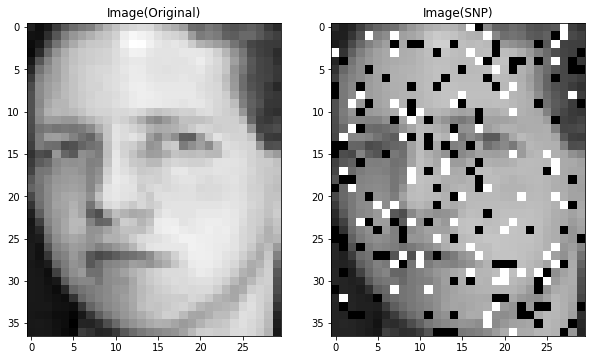

In [74]:
X, Y = load_data(root='data/ORL', reduce=3)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))
X_snp = SaltNPepper(0.2, 0.4).fit_transform(X)

ind = 2
img = X[:, ind]
img_snp = X_snp[:, ind]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(img.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(122)
plt.imshow(img_snp.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(SNP)')
plt.show()

## NMF l2 test

In [ ]:
@interact(n=widgets.IntSlider(min=1, max=400, step=1, value=400),
          d=widgets.IntSlider(min=1, max=2576, step=1, value=2576), 
          n_components=widgets.IntSlider(min=1, max=500, step=1, value=500),
          max_iter=widgets.IntSlider(min=0, max=1000, step=10, value=1000), 
          verbose=widgets.IntSlider(min=0, max=2, step=1, value=1),
          continuous_update=False)
def fit(n, d, n_components, max_iter, verbose):
    nmf_l2 = NmfL2Estimator(n_components, max_iter=max_iter, verbose=verbose)
    nmf_l2.fit(X[:d, :n])

### Test by checking reconstruction

In [88]:
n_components = 30
max_iter = 1000
verbose = 0

nmf_l2 = NmfL2Estimator(n_components, max_iter=max_iter, verbose=verbose)
H = nmf_l2.fit_transform(X_snp)
W = nmf_l2.components_
X_pred = W @ H

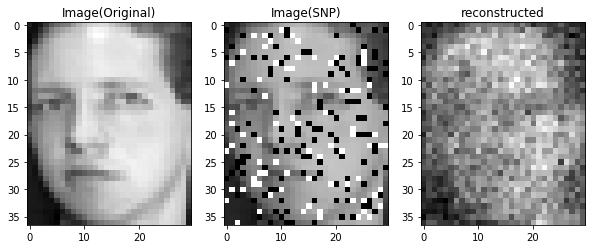

In [71]:
# Plot result.
import matplotlib.pyplot as plt
img_size = [i//3 for i in (92, 112)] # ORL
ind = 2 # index of demo image.
img = X[:, ind]
img_snp = X_snp[:, ind]
img_pred = X_pred[:, ind]

plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(img.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(132)
plt.imshow(img_snp.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(SNP)')
plt.subplot(133)
plt.imshow(img_pred.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('reconstructed')
plt.show()

## NMF hyper test

In [13]:
n_components = 2
num_samples = 1
d, n = X.shape

In [ ]:
@interact(n=widgets.IntSlider(min=1, max=400, step=1, value=400),
          d=widgets.IntSlider(min=1, max=2576, step=1, value=2576), 
          n_components=widgets.IntSlider(min=1, max=500, step=1, value=500),
          max_iter=widgets.IntSlider(min=0, max=1000, step=10, value=1000), 
          verbose=widgets.IntSlider(min=0, max=2, step=1, value=1),
          continuous_update=False)
def fit(n, d, n_components, max_iter, verbose):
    nmf_hyper = NmfHyperEstimator(n_components=n_components, max_iter=max_iter, verbose=verbose)
    nmf_hyper.fit(X[:d, :n])

### Test by checking reconstruction

In [66]:
n_components = 30
max_iter = 1000
verbose = 0

nmf_hyper = NmfHyperEstimator(n_components=n_components, max_iter=max_iter, verbose=verbose)
H = nmf_hyper.fit_transform(X_snp)
W = nmf_hyper.components_
X_pred = W @ H

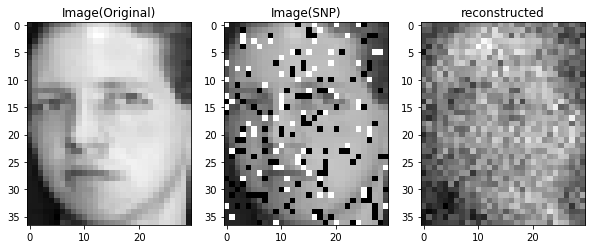

In [67]:
# Plot result.
import matplotlib.pyplot as plt
img_size = [i//3 for i in (92, 112)] # ORL
ind = 2 # index of demo image.
img = X[:, ind]
img_snp = X_snp[:, ind]
img_pred = X_pred[:, ind]

plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(img.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(132)
plt.imshow(img_snp.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(SNP)')
plt.subplot(133)
plt.imshow(img_pred.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('reconstructed')
plt.show()

## NMF L1 test

### Test by checking reconstruction

In [90]:
n_components = 30
max_iter = 1000
verbose = 0

nmf_l1 = NmfL1Estimator(n_components=n_components, verbose=verbose, max_iter=max_iter)
H = nmf_l1.fit_transform(X_snp)
W = nmf_l1.components_
X_pred = W @ H

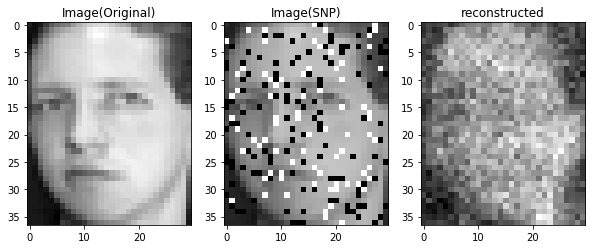

In [93]:
# Plot result.
import matplotlib.pyplot as plt
img_size = [i//3 for i in (92, 112)] # ORL
ind = 2 # index of demo image.
img = X[:, ind]
img_snp = X_snp[:, ind]
img_pred = X_pred[:, ind]

plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(img.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(132)
plt.imshow(img_snp.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(SNP)')
plt.subplot(133)
plt.imshow(img_pred.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('reconstructed')
plt.show()

## Verify with sklearn

### Test by checking reconstruction

In [91]:
from sklearn.decomposition import NMF

n_components = 30
max_iter = 1000
verbose = 0

nmf_sklearn = NMF(n_components=n_components)
H = nmf_sklearn.fit_transform(X_snp.T).T
W = nmf_sklearn.components_.T
X_pred = W @ H

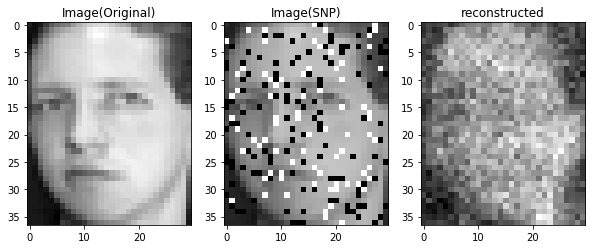

In [92]:
# Plot result.
import matplotlib.pyplot as plt
img_size = [i//3 for i in (92, 112)] # ORL
ind = 2 # index of demo image.
img = X[:, ind]
img_snp = X_snp[:, ind]
img_pred = X_pred[:, ind]

plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(img.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(132)
plt.imshow(img_snp.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(SNP)')
plt.subplot(133)
plt.imshow(img_pred.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('reconstructed')
plt.show()